In [ ]:
import pretty_midi
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def trim_midi(file_path, output_path, time_limit=60):
    # Load the MIDI file using pretty_midi
    midi_data = pretty_midi.PrettyMIDI(file_path)

    # Remove all notes that start after the specified time limit
    for instrument in midi_data.instruments:
        # Create a new list of notes that start before or at the time limit
        instrument.notes = [note for note in instrument.notes if note.start <= time_limit]

    # Save the trimmed MIDI file to the output path
    midi_data.write(output_path)

# Example usage:
file_path = 'debussy_cc_3.mid'  # Specify the path to your input MIDI file
output_path = 'trimmed_music3.mid'  # Specify the path to save the trimmed MIDI file
trim_midi(file_path, output_path, 60)


In [ ]:
def append_midi_files_sequentially(file_paths, output_path):

    # Initialize an empty PrettyMIDI object
    combined_midi = pretty_midi.PrettyMIDI()
    
    # Create two new instruments for the combined MIDI file (left and right hand)
    left_hand = pretty_midi.Instrument(program=0, name="Left Hand")
    right_hand = pretty_midi.Instrument(program=0, name="Right Hand")
    
    # Track the current time offset
    current_time_offset = 0.0

    for file_path in file_paths:
        # Load the current MIDI file
        midi_data = pretty_midi.PrettyMIDI(file_path)
        
        # Append notes from left and right hands
        for instrument_index, instrument in enumerate(midi_data.instruments[:2]):
            for note in instrument.notes:
                # Adjust the note timing by the current time offset
                note.start += current_time_offset
                note.end += current_time_offset
            
            # Add notes to the appropriate hand
            if instrument_index == 0:  # Left Hand
                left_hand.notes.extend(instrument.notes)
            elif instrument_index == 1:  # Right Hand
                right_hand.notes.extend(instrument.notes)
        
        # Update the time offset to ensure sequential appending
        max_time = max(
            [note.end for note in left_hand.notes + right_hand.notes] or [0]
        )
        current_time_offset = max_time

    # Add the combined instruments to the final MIDI object
    combined_midi.instruments.append(left_hand)
    combined_midi.instruments.append(right_hand)
    
    # Save the combined MIDI file
    combined_midi.write(output_path)
    print(f"Combined MIDI file saved to {output_path}")

# Example usage:
training_midi_files = ['debussy_cc_1.mid', 'debussy_cc_2.mid', 'debussy_cc_3.mid']  # Paths to training MIDI files
output_combined_path = 'combined_sequential_training_data.mid'  # Path to save the combined MIDI file
append_midi_files_sequentially(training_midi_files, output_combined_path)


Combined MIDI file saved to combined_sequential_training_data.mid


In [26]:
# File paths for the generated and reference MIDI files
generated_file_path = 'generated_music.mid'
reference_file_path = 'combined_sequential_training_data.mid'

# Load the generated and reference MIDI files using PrettyMIDI
generated_midi = pretty_midi.PrettyMIDI(generated_file_path)
reference_midi = pretty_midi.PrettyMIDI(reference_file_path)

# Titles for each hand (Left and Right) in both the generated and reference files
titles = [["Generated File: Left Hand", "Generated File: Right Hand"],
          ["Reference File: Left Hand", "Reference File: Right Hand"]]

# Colors assigned to each hand (Left and Right)
colors = ["brown", "orange"]


In [27]:
def extract_midi_data(midi_data):
    data_per_hand = []  # Initialize a list to store data for each hand

    # Loop through the first two instruments (representing the left and right hands)
    for instrument in midi_data.instruments[:2]:
        # Extract relevant note information for the instrument (hand)
        pitches = [note.pitch for note in instrument.notes]  # List of note pitches (frequency)
        starts = [note.start for note in instrument.notes]  # List of note start times
        durations = [note.end - note.start for note in instrument.notes]  # List of note durations (end - start)
        velocities = [note.velocity for note in instrument.notes]  # List of note velocities (intensity)

        # Append the extracted data for this hand as a tuple
        data_per_hand.append((pitches, starts, durations, velocities))

    return data_per_hand  # Return the extracted data for both hands


# Extract data for the generated and reference MIDI files
generated_data = extract_midi_data(generated_midi)
reference_data = extract_midi_data(reference_midi)


In [12]:
reference_midi.instruments[0].notes

[Note(start=0.122110, end=0.253060, pitch=55, velocity=25),
 Note(start=0.253060, end=0.383483, pitch=60, velocity=26),
 Note(start=0.383483, end=0.513907, pitch=62, velocity=24),
 Note(start=0.513907, end=0.644237, pitch=64, velocity=29),
 Note(start=0.644237, end=0.771694, pitch=55, velocity=27),
 Note(start=0.771694, end=0.897087, pitch=60, velocity=27),
 Note(start=0.897087, end=1.020418, pitch=64, velocity=26),
 Note(start=1.020418, end=1.142360, pitch=62, velocity=31),
 Note(start=1.142360, end=1.264301, pitch=53, velocity=29),
 Note(start=1.264301, end=1.386242, pitch=60, velocity=30),
 Note(start=1.386242, end=1.508183, pitch=62, velocity=27),
 Note(start=1.508183, end=1.628656, pitch=65, velocity=34),
 Note(start=1.628656, end=1.749128, pitch=57, velocity=31),
 Note(start=1.749128, end=1.869600, pitch=59, velocity=32),
 Note(start=1.869600, end=1.990072, pitch=65, velocity=30),
 Note(start=1.990072, end=2.108173, pitch=64, velocity=37),
 Note(start=2.108173, end=2.226274, pitc

{'Piano left': 142, 'Piano right': 351}
{'Right Hand': 1229, 'Left Hand': 1832}


C:\Users\Никита\AppData\Local\Temp\ipykernel_31004\1664739024.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\Никита\AppData\Local\Temp\ipykernel_31004\1664739024.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


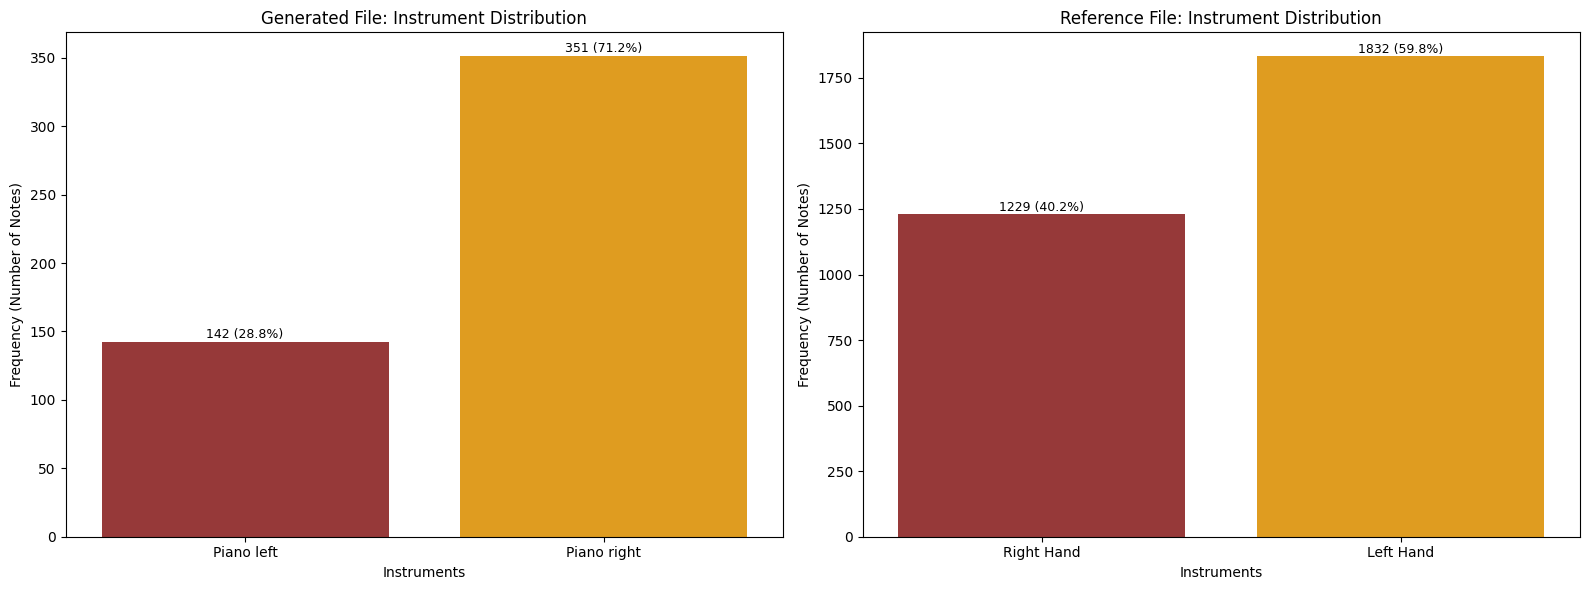

In [ ]:
def analyze_two_midi_files(generated_path, reference_path):
    def plot_instrument_distribution(midi_data, title, ax):
    
        # Analyze instruments
        instrument_counts = {instr.name: len(instr.notes) for instr in reversed(midi_data.instruments)}

        # Create the bar plot
        barplot = sns.barplot(
            x=list(instrument_counts.keys()), 
            y=list(instrument_counts.values()), 
            ax=ax, 
            palette=(colors)
        )
        
        # Add values above each bar
        for bar, count in zip(barplot.patches, instrument_counts.values()):
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate of the bar's center
                bar.get_height() + 1,              # Y-coordinate slightly above the bar
                f"{count} ({round(count * 100 / sum(instrument_counts.values()), 1)}%)",  # Text
                ha='center', va='bottom', fontsize=9
            )
        
        ax.set_title(title)
        ax.set_xlabel("Instruments")
        ax.set_ylabel("Frequency (Number of Notes)")
        ax.tick_params(axis='x')

    # Load MIDI files
    generated_midi = pretty_midi.PrettyMIDI(generated_path)
    reference_midi = pretty_midi.PrettyMIDI(reference_path)

    # Create subplots for instrument distribution comparison
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    plot_instrument_distribution(generated_midi, "Generated File: Instrument Distribution", axs[0])
    plot_instrument_distribution(reference_midi, "Reference File: Instrument Distribution", axs[1])
    plt.tight_layout()
    plt.show()

# Example usage:
analyze_two_midi_files(generated_file_path, reference_file_path)


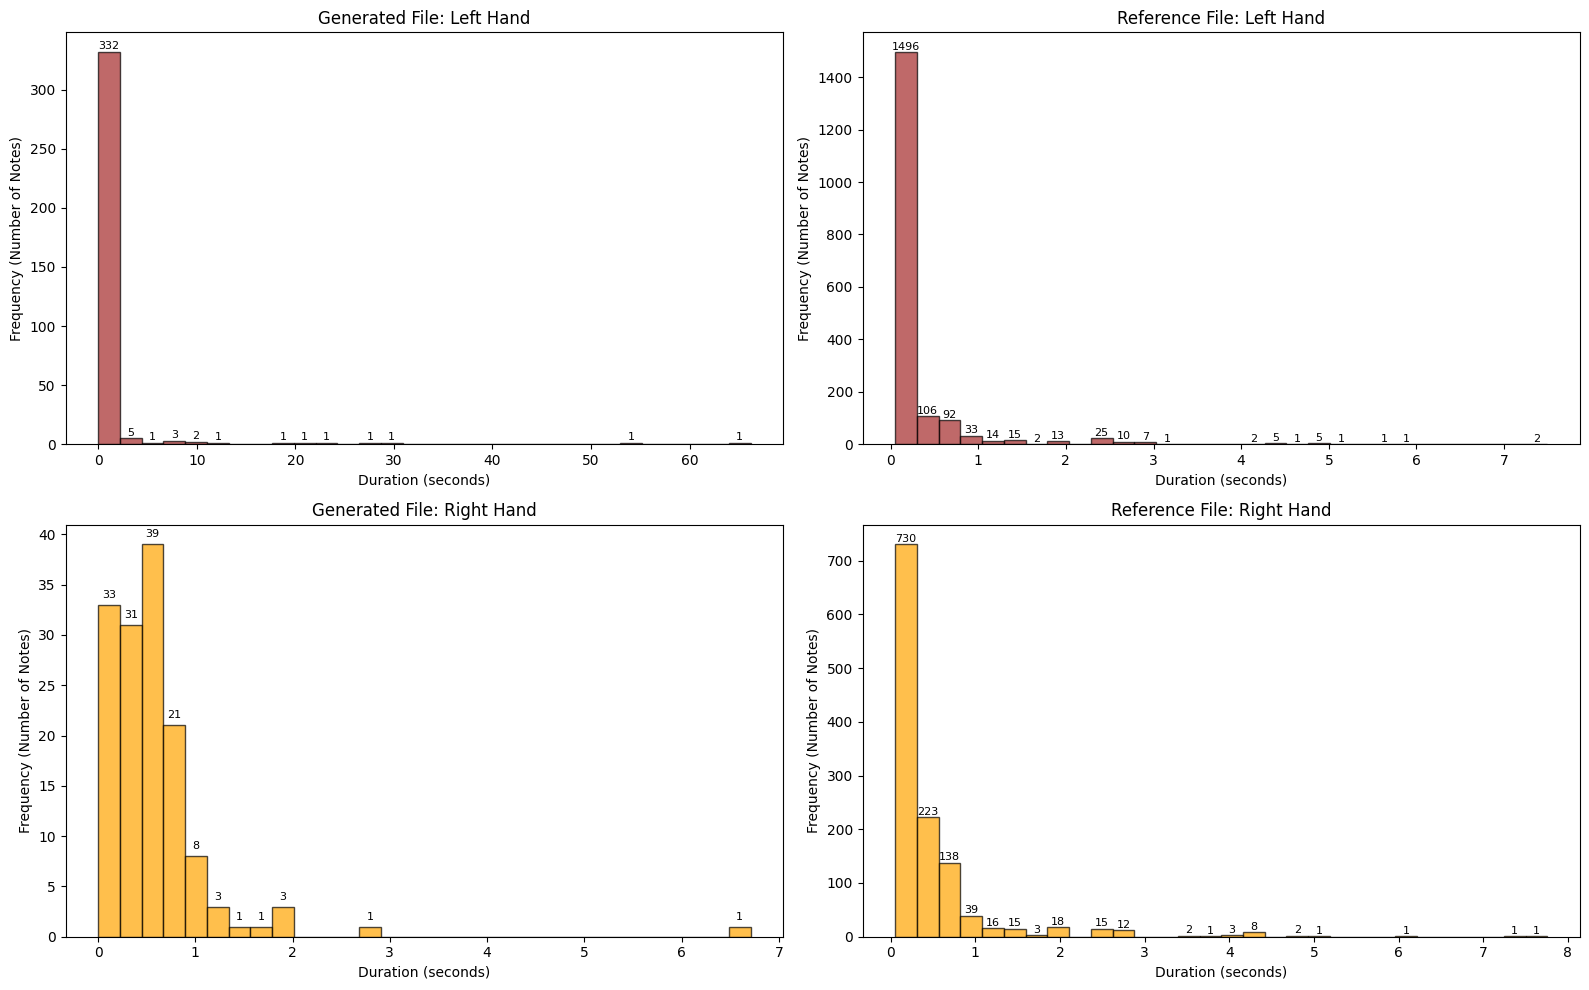

In [31]:
def analyze_two_hands(generated_path, reference_path):
    def plot_durations(ax, midi_data, hand, title, color):
        instrument = midi_data.instruments[hand]  # Left or Right Hand
        durations = [note.end - note.start for note in instrument.notes]
        
        if durations:  # Check if there are any notes
            hist = ax.hist(
                durations, bins=30, alpha=0.7, 
                color=color, edgecolor='black'
            )
            # Add frequency counts on bars
            for j in range(len(hist[0])):
                if hist[0][j] > 0:
                    ax.text(
                        hist[1][j] + (hist[1][1] - hist[1][0]) / 2,  # Center of the bar
                        hist[0][j] + 0.5,                           # Bar height
                        int(hist[0][j]),                            # Frequency
                        ha='center', va='bottom', fontsize=8
                    )
            ax.set_title(title)
            ax.set_xlabel("Duration (seconds)")
            ax.set_ylabel("Frequency (Number of Notes)")
        else:
            ax.text(0.5, 0.5, "No Data", ha='center', va='center', fontsize=12)
            ax.set_title(title)

    # Set up the figure
    fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # Two rows for left and right hands
    
    # Left Hand
    plot_durations(axs[0][0], generated_midi, hand=0, title=titles[0][0], color=colors[0])
    plot_durations(axs[0][1], reference_midi, hand=0, title=titles[1][0], color=colors[0])
    
    # Right Hand
    plot_durations(axs[1][0], generated_midi, hand=1, title=titles[0][1], color=colors[1])
    plot_durations(axs[1][1], reference_midi, hand=1, title=titles[1][1], color=colors[1])
    
    plt.tight_layout()
    plt.show()

# Example usage
analyze_two_hands(generated_file_path, reference_file_path)


C:\Users\Никита\AppData\Local\Temp\ipykernel_31004\2120072017.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Никита\AppData\Local\Temp\ipykernel_31004\2120072017.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Никита\AppData\Local\Temp\ipykernel_31004\2120072017.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Никита\AppData\Local\Temp\ipykernel_31004\2120072017.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

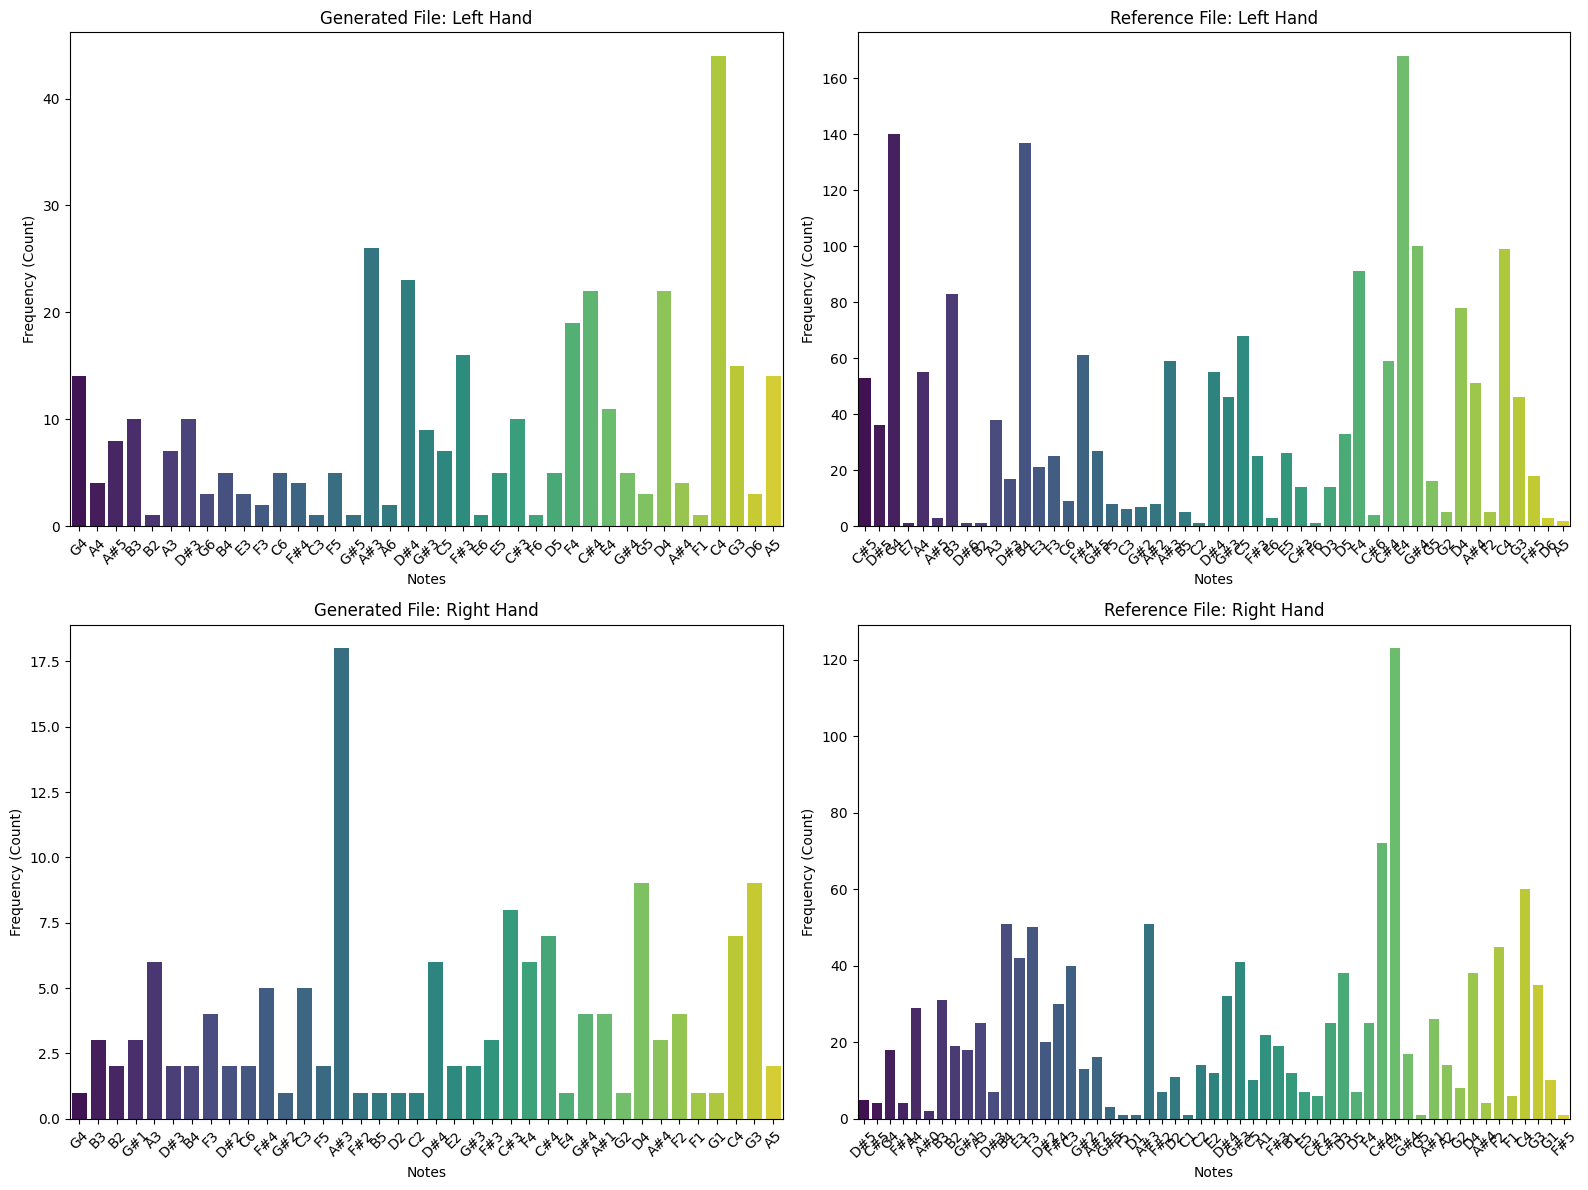

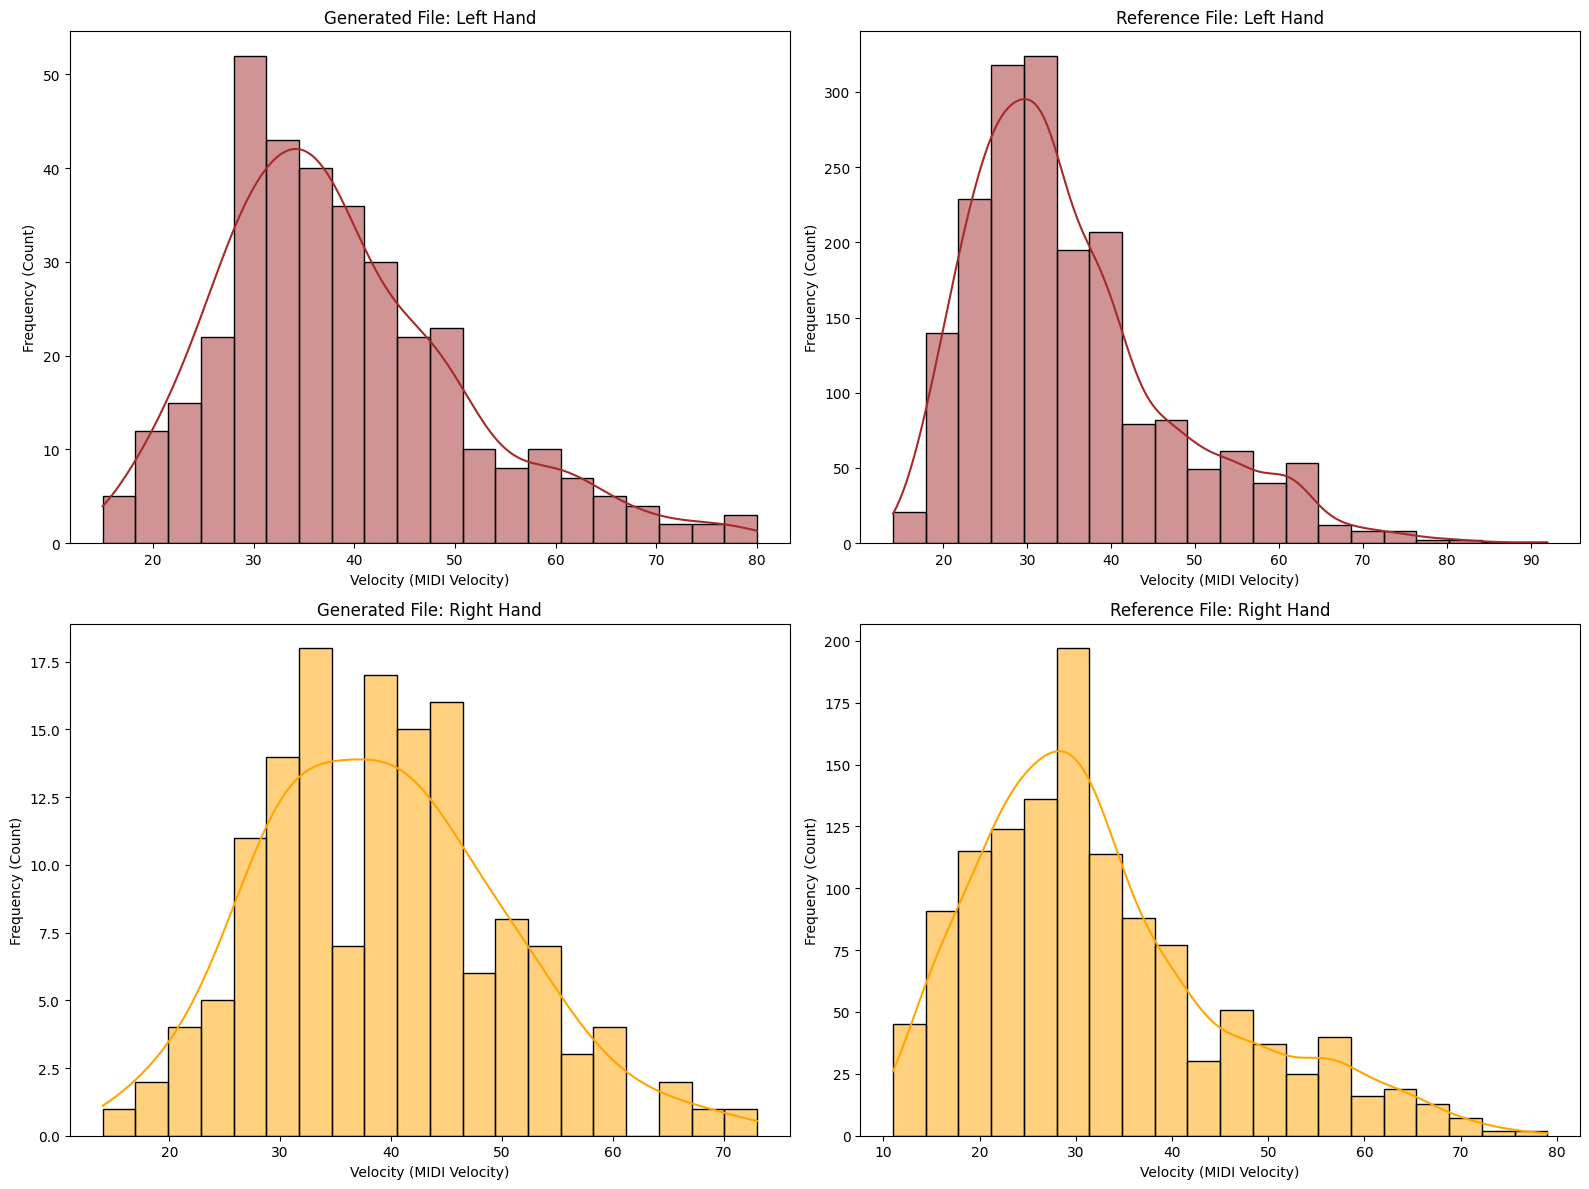

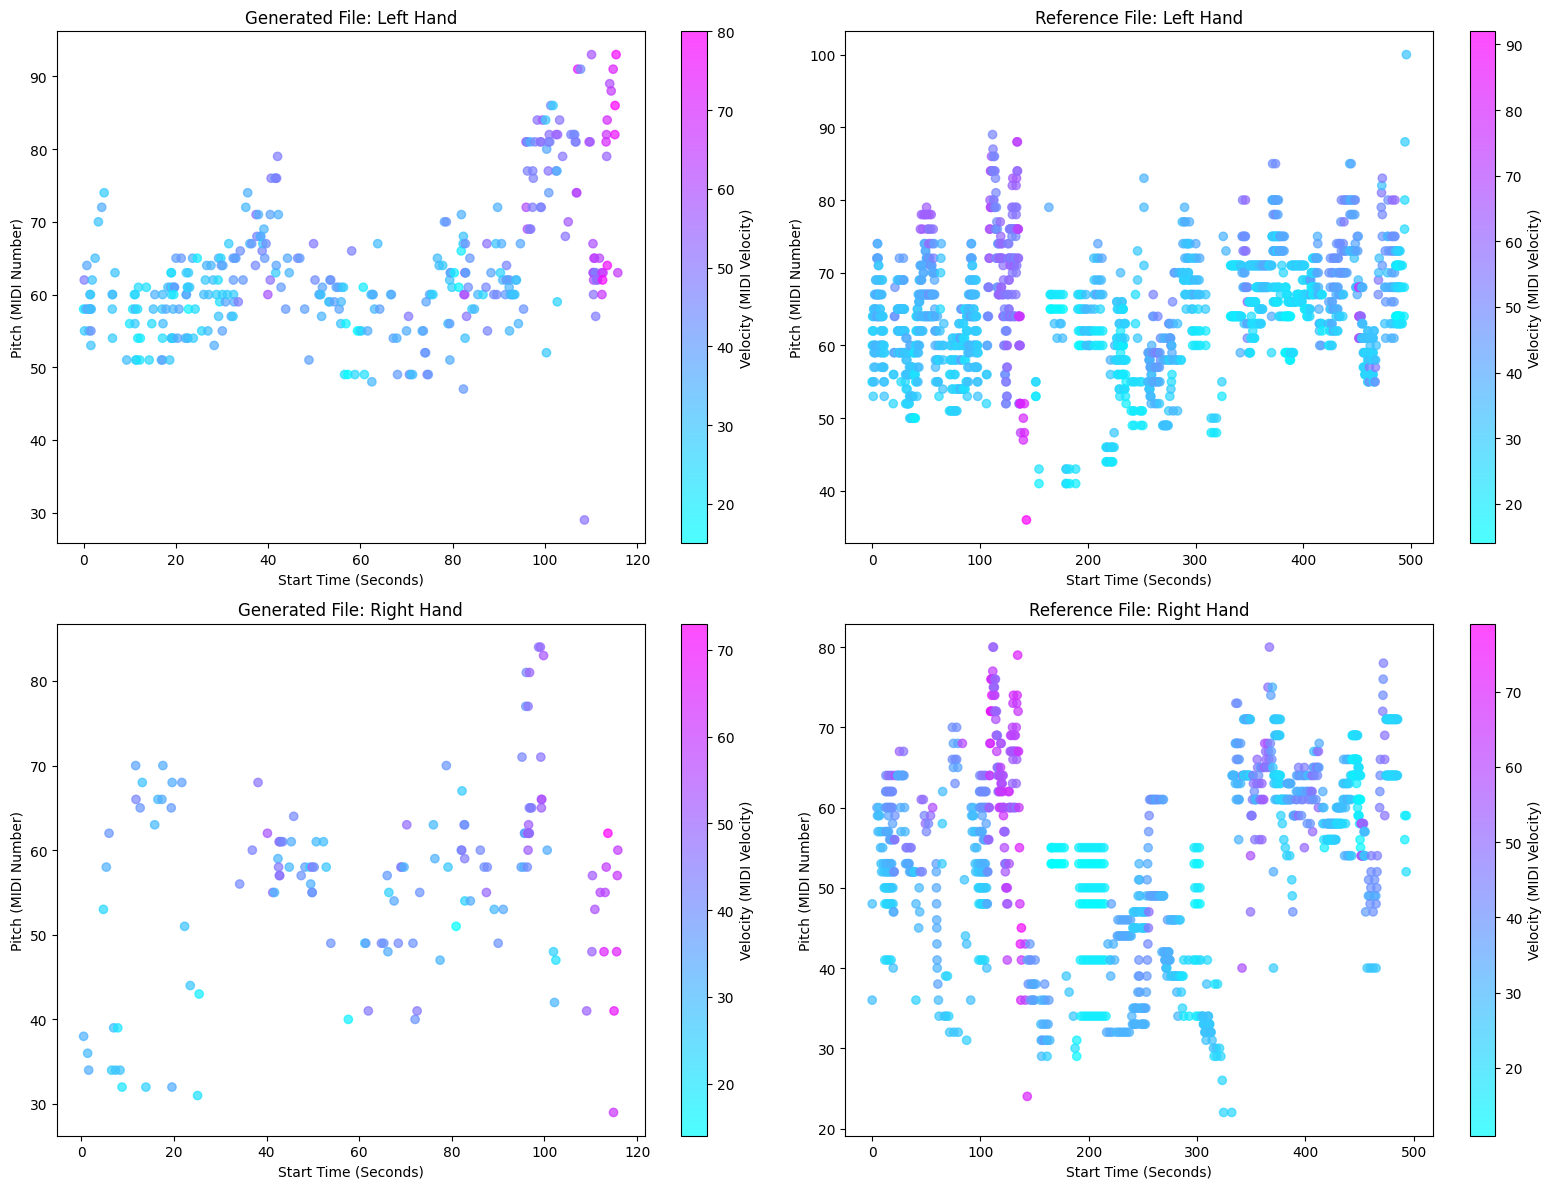

In [ ]:

def extended_analyze_generation_by_hands():
    
    # 1. Pitch Distribution
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid for the hands
    for i, data in enumerate([generated_data, reference_data]):
        for hand, ax in enumerate(axes[:, i]):
            note_names = [pretty_midi.note_number_to_name(note) for note in data[hand][0]]
            note_counts = {note: note_names.count(note) for note in set(note_names)}
            sns.barplot(
                x=list(note_counts.keys()),
                y=list(note_counts.values()),
                palette="viridis",
                ax=ax
            )
            ax.set_title(f"{titles[i][hand]}")
            ax.set_xlabel("Notes")
            ax.set_ylabel("Frequency (Count)")
            ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Velocity Distribution
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    for i, data in enumerate([generated_data, reference_data]):
        for hand, ax in enumerate(axes[:, i]):
            sns.histplot(data[hand][3], kde=True, bins=20, color=colors[hand], ax=ax)
            ax.set_title(f"{titles[i][hand]}")
            ax.set_xlabel("Velocity (MIDI Velocity)")
            ax.set_ylabel("Frequency (Count)")
    plt.tight_layout()
    plt.show()

    # 3. Rhythm Map (Start Time vs Pitch)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    for i, (data, title) in enumerate(zip([generated_data, reference_data], titles)):
        for hand, ax in enumerate(axes[:, i]):
            scatter = ax.scatter(
                data[hand][1],  # Start times (seconds)
                data[hand][0],  # Pitches (MIDI Number)
                c=data[hand][3], cmap='cool', alpha=0.7
            )
            ax.set_title(f"{titles[i][hand]}")
            ax.set_xlabel("Start Time (Seconds)")
            ax.set_ylabel("Pitch (MIDI Number)")
            plt.colorbar(scatter, ax=ax, label="Velocity (MIDI Velocity)")
    plt.tight_layout()
    plt.show()

# Analyze the files
extended_analyze_generation_by_hands()
